In [1]:
# %load /home/glebi/git/experiment-automation/processing_tools.py
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import scienceplots

plt.style.use(['science', 'russian-font'])

matplotlib.rcParams.update({
    'figure.figsize': [6, 4],
    'savefig.facecolor': 'white',
    'figure.dpi': 150.0,
    'font.size': 12.0,
})

## Измерение ВАХ

In [2]:
def I_D(x, n0Sd):
    D = 10e-9
    e = 1.6e-19
    T = 273.15 + 15
    k_B = 1.380649e-23
    return n0Sd * (e*D) * np.tanh((e*x) / (2*k_B*T))

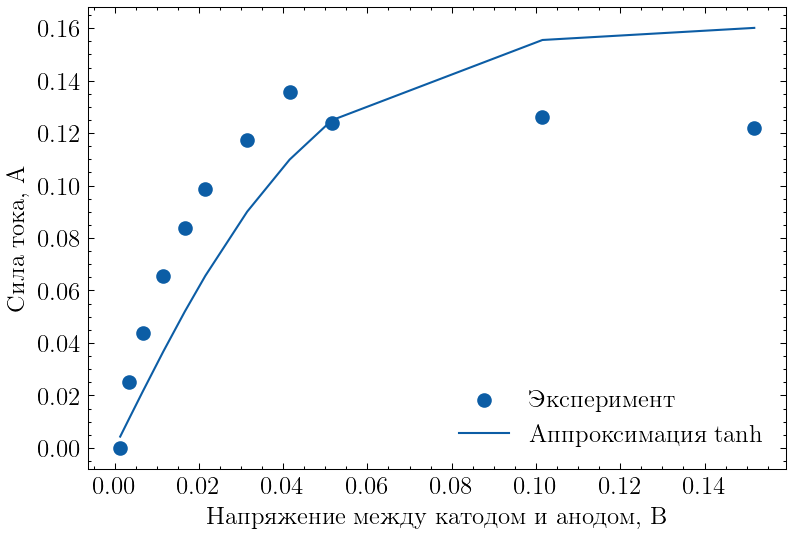

In [3]:
df = pd.read_csv("vah.csv")
U = np.array(df["Udac"])
I = np.array(df["Uadc"])
I = (I - I[0])*1e-3
U = U*1e-3

p0 = (9e-7 / 100e-6 * 6e28)
popt, pcov = curve_fit(I_D, U, I, p0=p0)

plt.scatter(U, I, label="Эксперимент")
plt.plot(U, I_D(U, *popt), label=r"Аппроксимация $\tanh$")
plt.ylabel("Сила тока, А")
plt.xlabel("Напряжение между катодом и анодом, В")

plt.legend()
plt.savefig('vah.svg')
plt.show()

## Измерение АЧХ

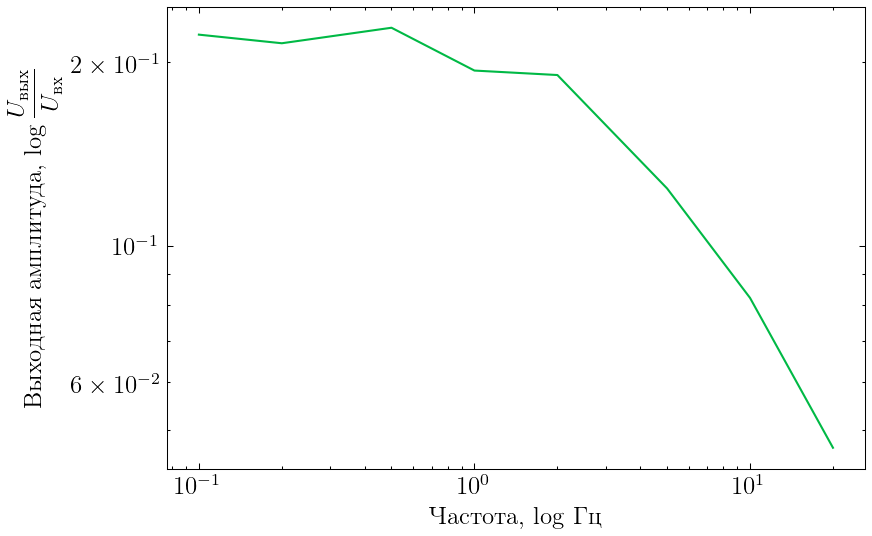

In [5]:
df = pd.read_csv("afc.csv")
freq = np.array(df['freq'])
A = np.array(df['delta_out']) / np.array(df['delta_in'])

plt.plot(freq, A, color='C1')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Частота, $\log$ Гц')
plt.ylabel(r'Выходная амплитуда, $\log{\dfrac{U_\text{вых}}{U_\text{вх}}}$')

# plt.legend()
plt.savefig('afc.svg')
plt.show()

## Вторичная обработка

Text(0.5, 0, 'Время, мс')

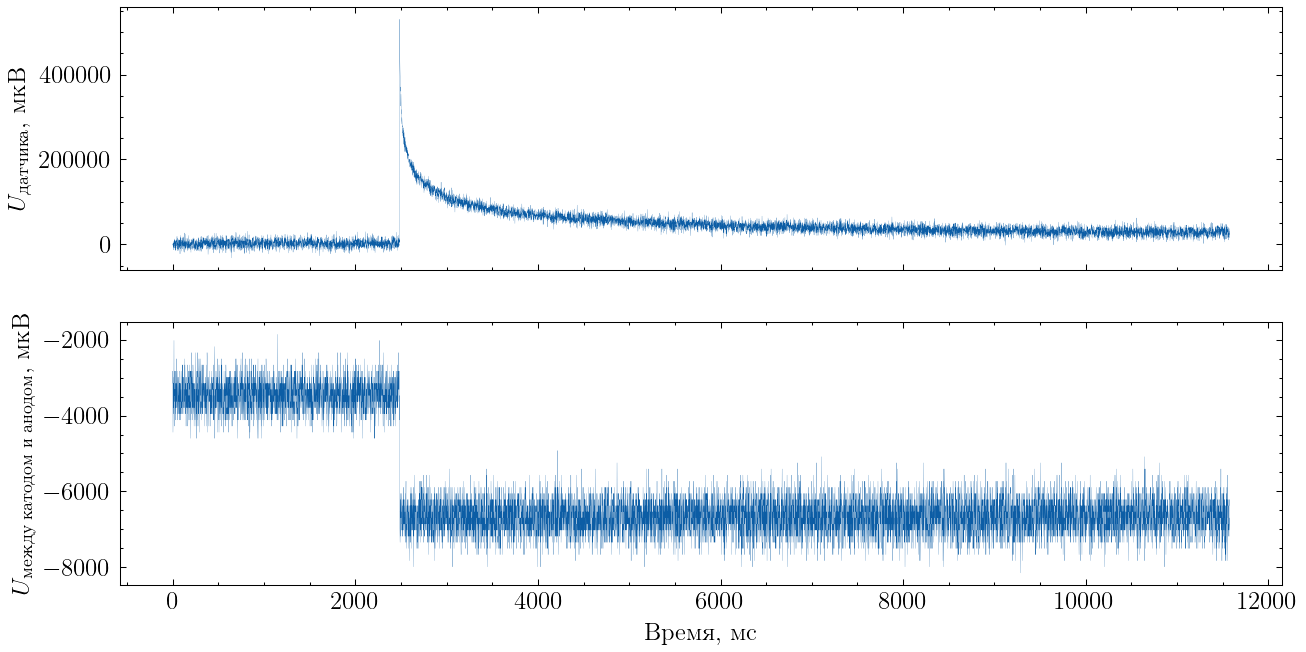

In [43]:
c1 = np.fromfile(r'raw-data/vah5c1', dtype=np.int32)
c2 = np.fromfile(r'raw-data/vah5c2', dtype=np.int32)
start = 0
step = 1 # mseconds
num = len(c1)
t = np.linspace(start, start + step*num, num)

fig, ax = plt.subplots(2,1, figsize=(10,5), sharex=True)
ax[0].plot(t, c1, linewidth=.1)
ax[1].plot(t, c2, linewidth=.1)

ax[0].set_ylabel(r'$U_\text{датчика}$, мкВ')
ax[1].set_ylabel(r'$U_\text{между катодом и анодом}$, мкВ')
ax[1].set_xlabel('Время, мс')

In [69]:
selection_num = 1000
U_ravn = c1[-selection_num:]
mean1 = np.mean(U_ravn)
std1 = np.std(U_ravn)

U_between = c2[-selection_num:]
mean2 = np.mean(U_between)
std2 = np.std(U_between)

print(f"""Среднее напряжение между катодом и анодом, мВ: \t{-mean2*1e-3:.2f} +- {std2*1e-3:.2f}
Среднее установившееся напряжение, мВ: \t\t{mean1*1e-3:.2f} +- {std1*1e-3:.2f}""")

Среднее напряжение между катодом и анодом, мВ: 	6.64 +- 0.43
Среднее установившееся напряжение, мВ: 		28.33 +- 8.77
